In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\User\Desktop\Datasets\Bitcoin/bitcoin_price_Training - Training.csv')

In [5]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [6]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
data = df.sort_index(ascending=False).reset_index()

In [9]:
data.drop('index' , axis=1 , inplace=True)

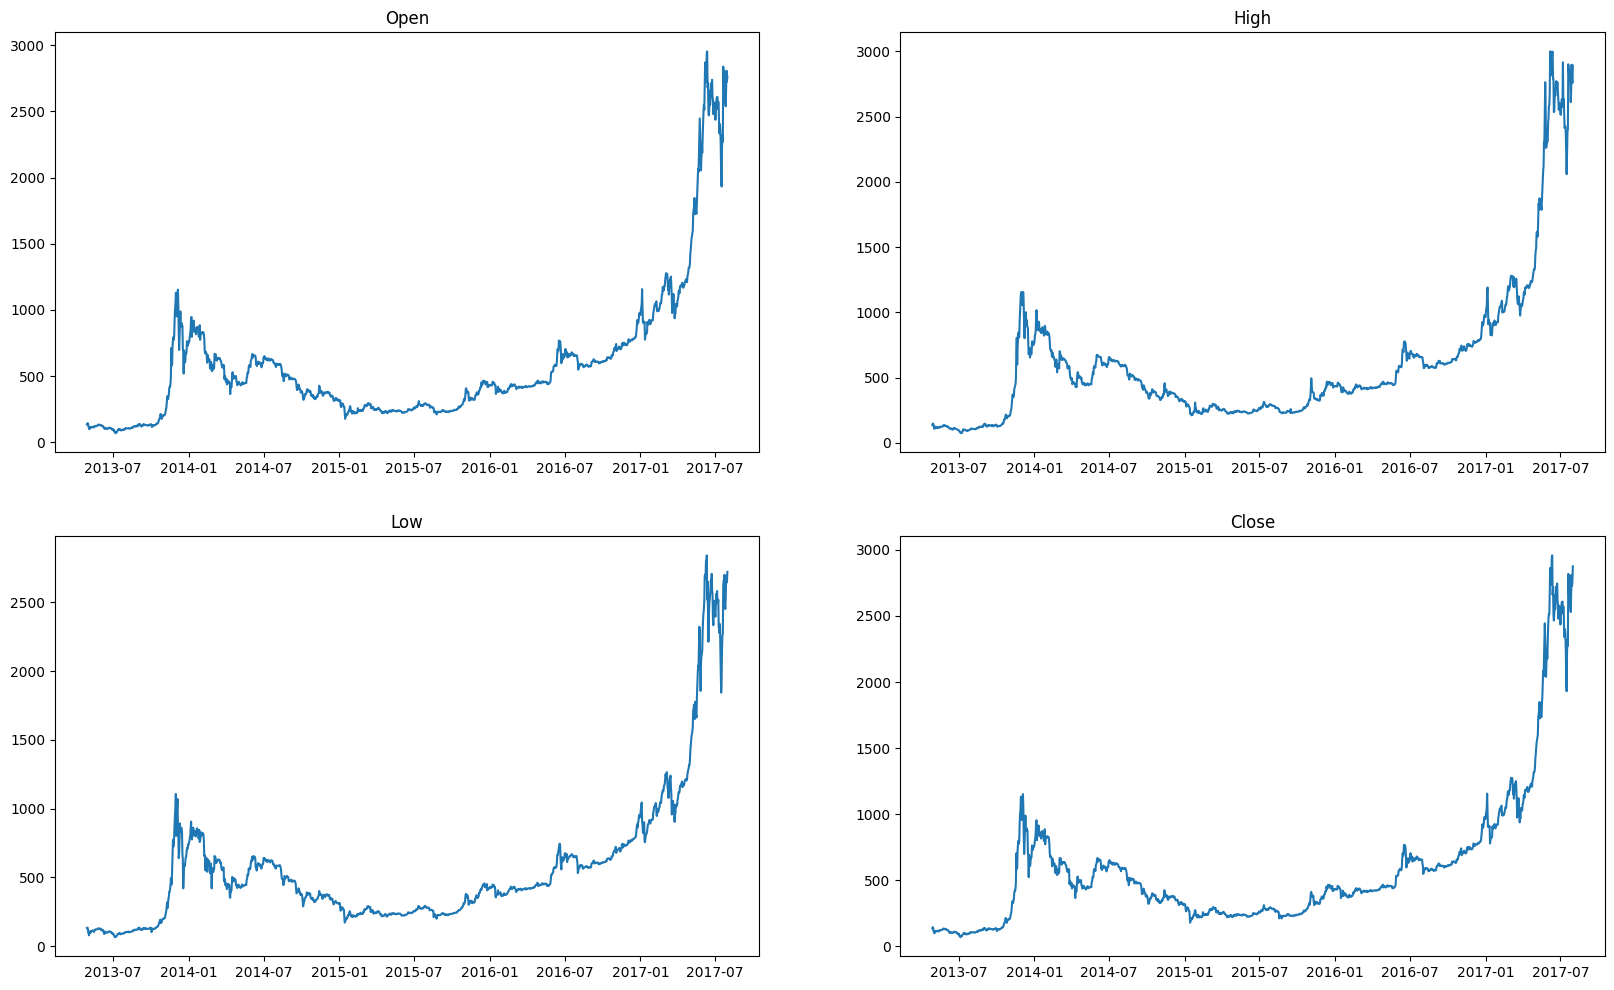

In [10]:
plt.figure(figsize=(20,12))
for index , col in enumerate(['Open' , 'High' , 'Low' , 'Close'] , 1) :
    plt.subplot(2,2,index)
    plt.plot(df['Date'] , df[col])
    plt.title(col)

In [18]:
bitcoin_sample = data[0:50]

In [11]:
!pip install chart_studio
!pip install plotly

In [13]:
import chart_studio.plotly as py 
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs  , init_notebook_mode , plot , iplot

In [14]:
init_notebook_mode(connected=True)

In [19]:
trace = go.Candlestick(x=bitcoin_sample['Date'],
                      high=bitcoin_sample['High'],
                      open=bitcoin_sample['Open'],
                      close = bitcoin_sample['Close'],
                      low = bitcoin_sample['Low'])

In [24]:
candle_data = [trace]

layout = {
    'title' : 'Bitcoin Historical Price' , 
    'xaxis' : {'title' : 'Date'}
        
}

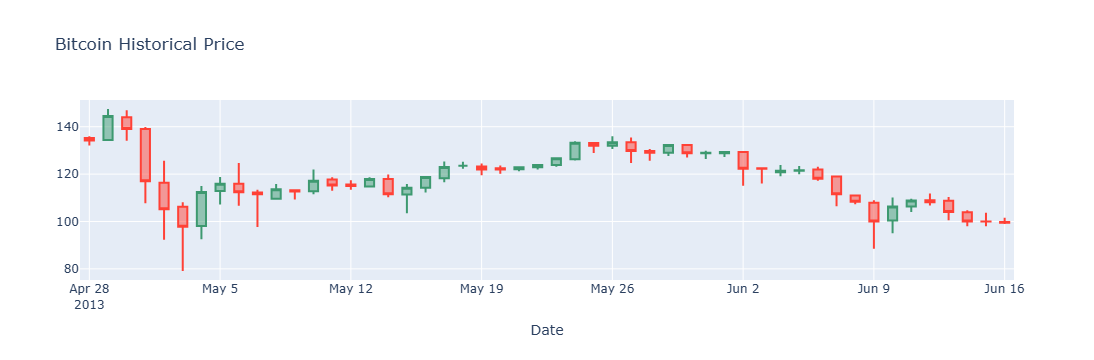

In [25]:
fig = go.Figure(data = candle_data , layout =layout)

fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

In [26]:
data.set_index('Date' , inplace=True)

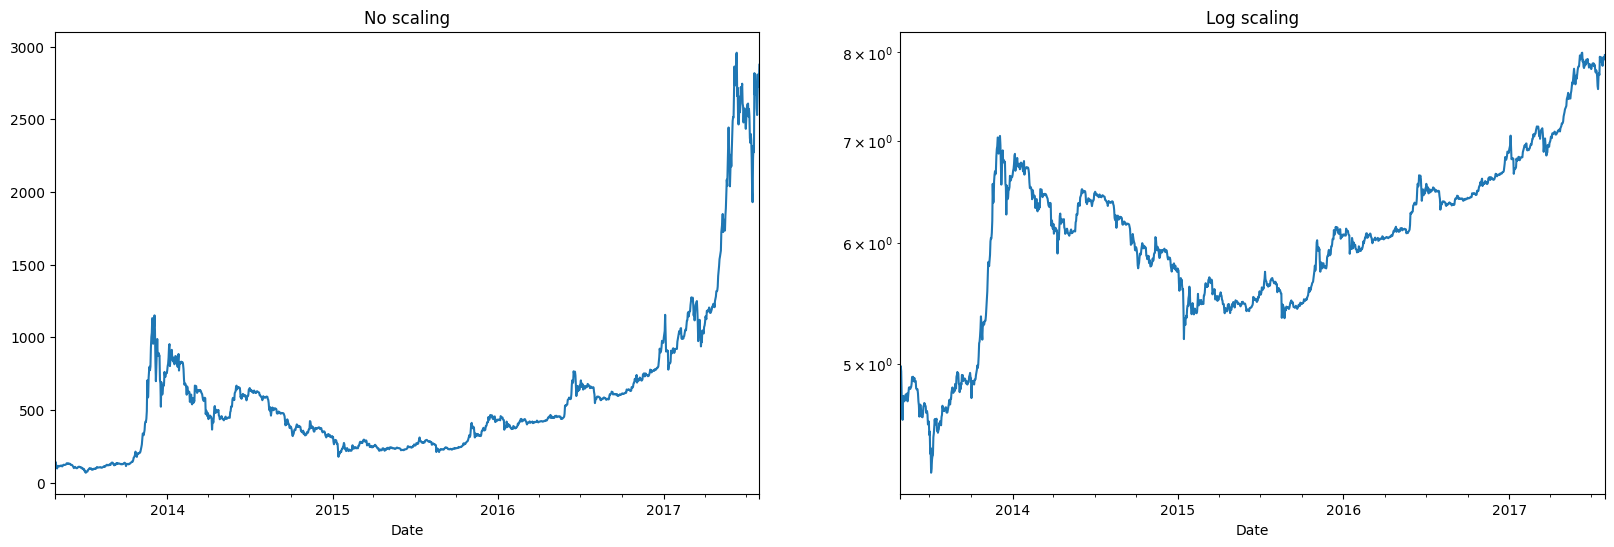

In [29]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
data['Close'].plot()
plt.title('No scaling')

plt.subplot(1,2,2)
np.log1p(data['Close']).plot()
plt.title('Log scaling')
plt.yscale('log')

<Axes: xlabel='Date'>

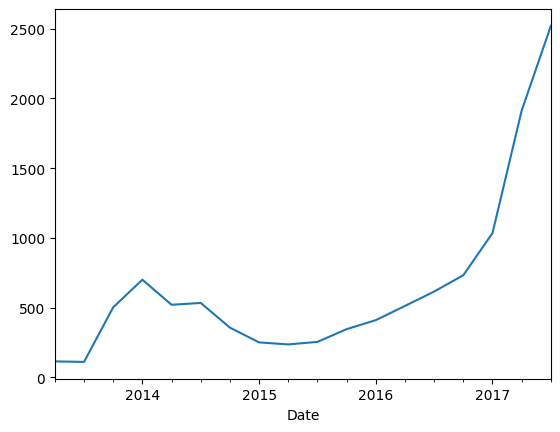

In [31]:
data['Close'].resample('QE').mean().plot()

<Axes: xlabel='Date'>

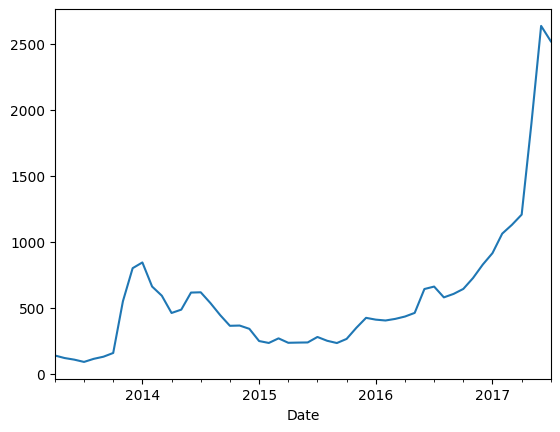

In [33]:
data['Close'].resample('ME').mean().plot()

In [34]:
data['Close_price_pct_change'] = data['Close'].pct_change()*100

<Axes: xlabel='Date'>

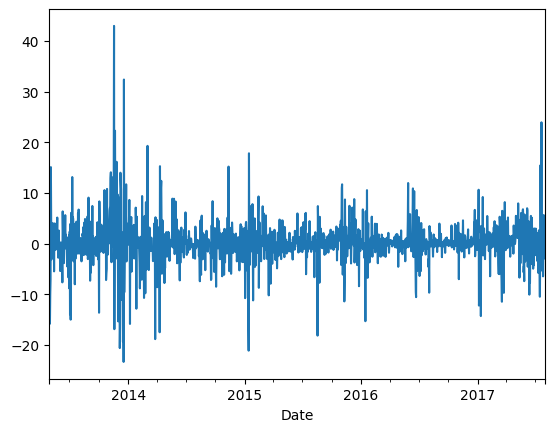

In [35]:
data['Close_price_pct_change'].plot()